# Submit to the competition

To test your results, you'll need to join the competition (if you haven't already).  So open a new window by clicking on **[this link](https://www.kaggle.com/c/home-data-for-ml-course)**.  Then click on the **Join Competition** button.

![join competition image](https://storage.googleapis.com/kaggle-media/learn/images/axBzctl.png)

Next, follow the instructions below:
1. Begin by clicking on the **Save Version** button in the top right corner of the window.  This will generate a pop-up window.  
2. Ensure that the **Save and Run All** option is selected, and then click on the **Save** button.
3. This generates a window in the bottom left corner of the notebook.  After it has finished running, click on the number to the right of the **Save Version** button.  This pulls up a list of versions on the right of the screen.  Click on the ellipsis **(...)** to the right of the most recent version, and select **Open in Viewer**.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
4. Click on the **Data** tab near the top of the screen.  Then, click on the file you would like to submit, and click on the **Submit** button to submit your results to the leaderboard.

You have now successfully submitted to the competition!

If you want to keep working to improve your performance, select the **Edit** button in the top right of the screen. Then you can change your code and repeat the process. There's a lot of room to improve, and you will climb up the leaderboard as you work.


# Continue Your Progress
There are many ways to improve your model, and **experimenting is a great way to learn at this point.**

The best way to improve your model is to add features.  To add more features to the data, revisit the first code cell, and change this line of code to include more column names:
```python
features = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
```

Some features will cause errors because of issues like missing values or non-numeric data types.  Here is a complete list of potential columns that you might like to use, and that won't throw errors:
- 'MSSubClass'
- 'LotArea'
- 'OverallQual' 
- 'OverallCond' 
- 'YearBuilt'
- 'YearRemodAdd' 
- '1stFlrSF'
- '2ndFlrSF' 
- 'LowQualFinSF' 
- 'GrLivArea'
- 'FullBath'
- 'HalfBath'
- 'BedroomAbvGr' 
- 'KitchenAbvGr' 
- 'TotRmsAbvGrd' 
- 'Fireplaces' 
- 'WoodDeckSF' 
- 'OpenPorchSF'
- 'EnclosedPorch' 
- '3SsnPorch' 
- 'ScreenPorch' 
- 'PoolArea' 
- 'MiscVal' 
- 'MoSold' 
- 'YrSold'

Look at the list of columns and think about what might affect home prices.  To learn more about each of these features, take a look at the data description on the **[competition page](https://www.kaggle.com/c/home-data-for-ml-course/data)**.

After updating the code cell above that defines the features, re-run all of the code cells to evaluate the model and generate a new submission file.  


# What's next?

As mentioned above, some of the features will throw an error if you try to use them to train your model.  The **[Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning)** course will teach you how to handle these types of features. You will also learn to use **xgboost**, a technique giving even better accuracy than Random Forest.

The **[Pandas](https://kaggle.com/Learn/Pandas)** course will give you the data manipulation skills to quickly go from conceptual idea to implementation in your data science projects. 

You are also ready for the **[Deep Learning](https://kaggle.com/Learn/intro-to-Deep-Learning)** course, where you will build models with better-than-human level performance at computer vision tasks.

In [109]:
# Import helpful libraries
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Load the data, and separate the target
iowa_file_path = 'train.csv'
home_data = pd.read_csv(iowa_file_path)

# Potential features
"""features = ['MSSubClass', 'LotArea','OverallQual' ,'OverallCond','YearBuilt', 
    'YearRemodAdd','1stFlrSF','2ndFlrSF', 'LowQualFinSF','GrLivArea', 'FullBath','HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 
    'ScreenPorch','PoolArea', 'MiscVal','MoSold', 'YrSold']"""

y = home_data.SalePrice
X = home_data.drop(columns=['SalePrice'])

**1. Data Exploration**: Start by exploring the dataset using summary statistics and visualization techniques to get an overview of the data distribution, missing values, and any potential outliers.

In [110]:
# Display the first few rows of the dataset
print(home_data.head())

# Check the dimensions of the dataset
print("Number of rows:", home_data.shape[0])
print("Number of columns:", home_data.shape[1])

# Summary statistics of numerical features
print(home_data.describe())

# Check for missing values in each column
print("Missing values per column:")
print(home_data.isnull().sum())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

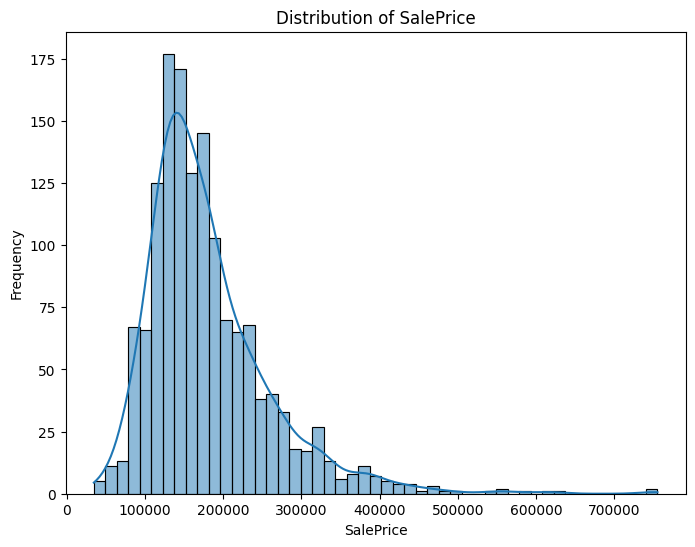

In [111]:
# Visualize the distribution of the target variable (SalePrice)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(home_data['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


C:\Users\Dani\AppData\Local\Temp;\ipykernel_23344\4046380069.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = home_data.corr()


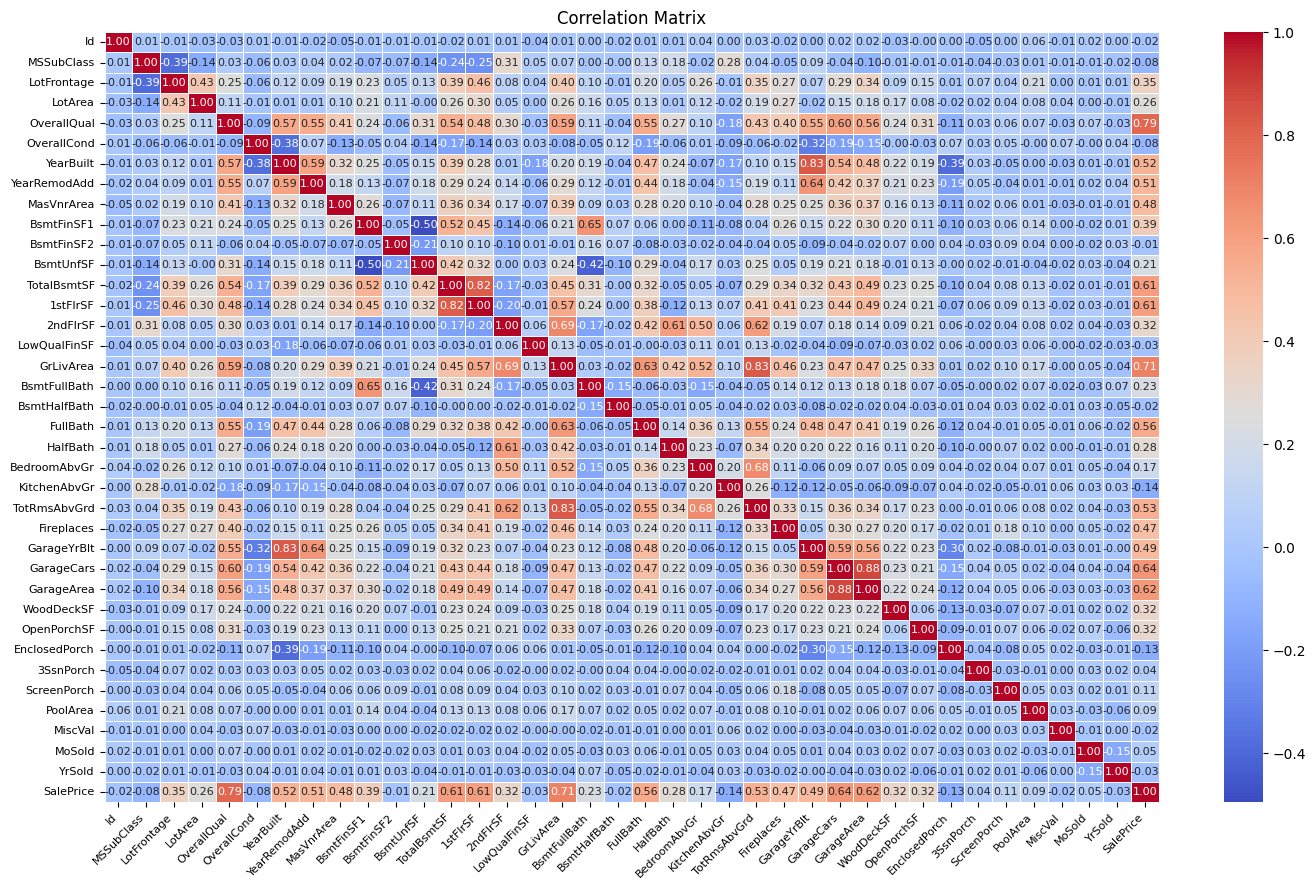

In [112]:
# Visualize the correlation matrix with improved readability
plt.figure(figsize=(17, 10))
correlation_matrix = home_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, annot_kws={"size": 8})
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.title("Correlation Matrix")
plt.show()

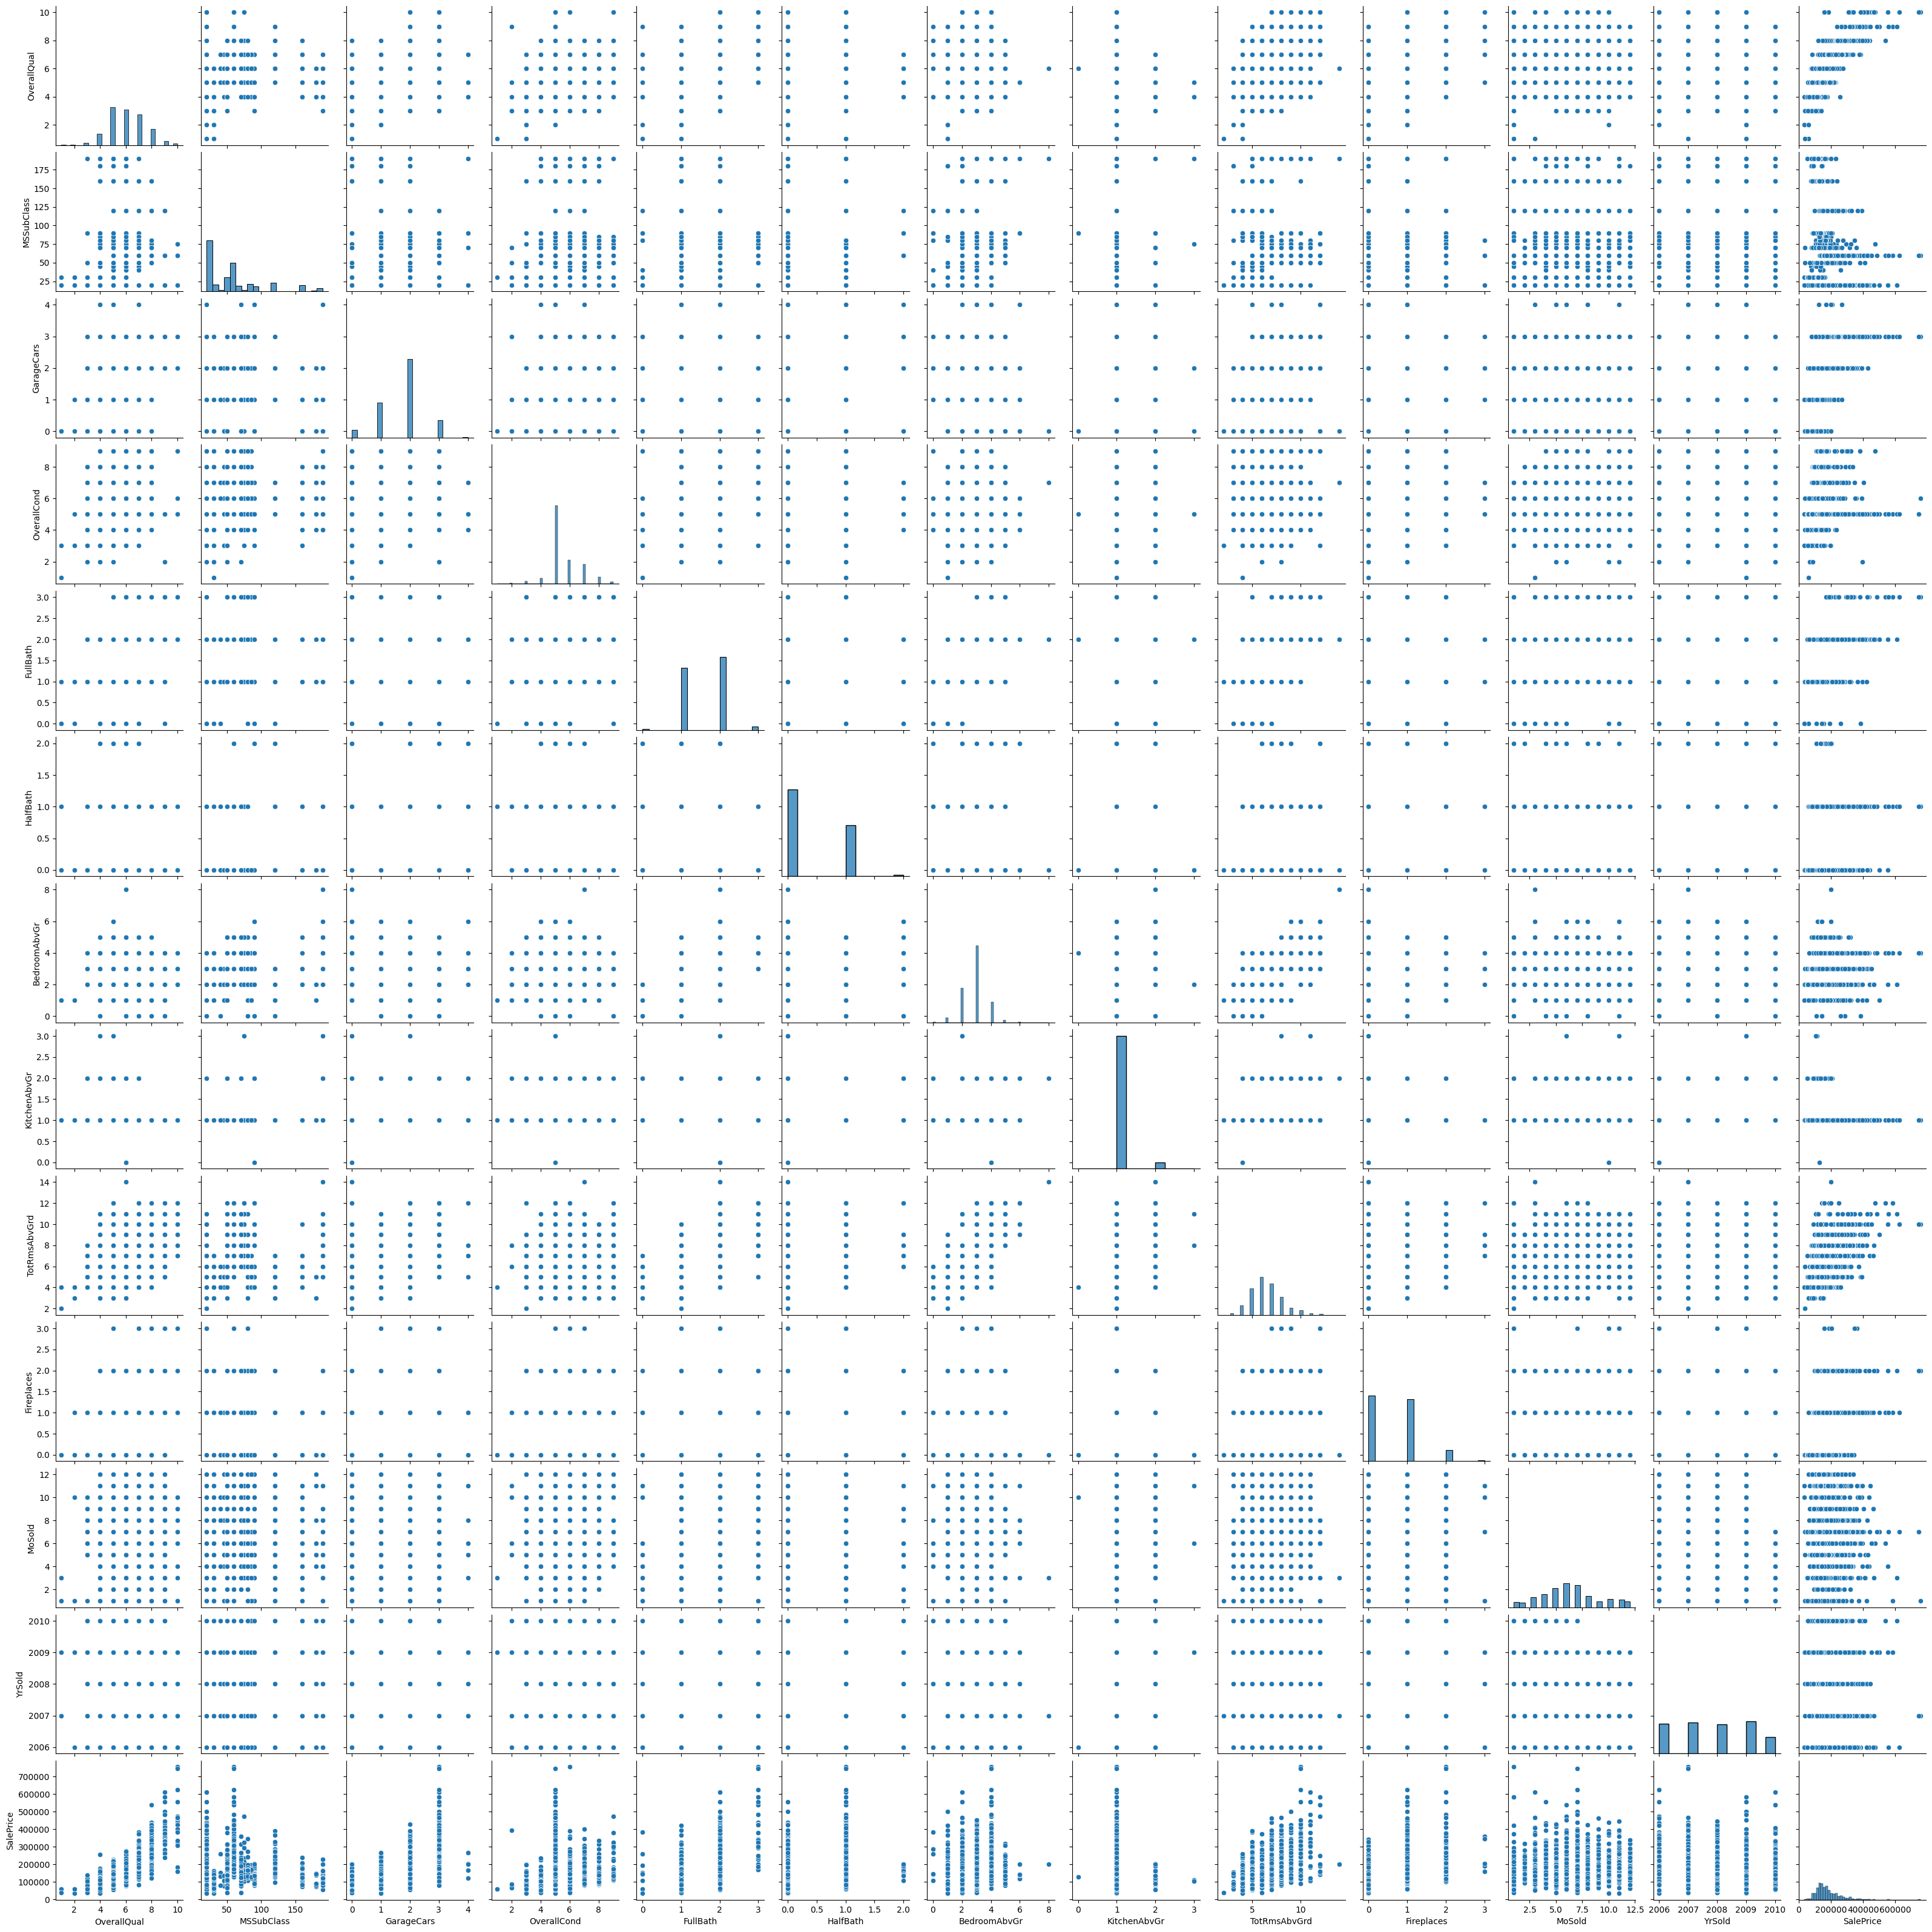

In [113]:
# Select a subset of features for the pair plot
discrete_features = ['OverallQual', 'MSSubClass', 'GarageCars', 'OverallCond', 'FullBath', 'HalfBath', 'BedroomAbvGr',
    'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces', 'MoSold', 'YrSold', 'SalePrice']

# Filter the data to remove any rows with missing values in the selected features
filtered_data = home_data[discrete_features]

# Plot a pair plot with the filtered data
sns.pairplot(data=filtered_data, kind='scatter')
plt.show()

In [114]:
continuous_features = ['LotArea', 'GrLivArea',  'YearBuilt', 'YearRemodAdd','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
    'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch','3SsnPorch', 'ScreenPorch','PoolArea', 'MiscVal', 'SalePrice']

**2. Data Preprocessing:**

Encoding categorical variables


In [115]:
from sklearn.preprocessing import OneHotEncoder

# Select columns with categorical values
categorical_columns = home_data.select_dtypes(include='object').columns
"""# Display the unique elements of each column with categorical values
for column in categorical_columns:
    unique_elements = home_data[column].unique()
    print(f"Column '{column}': {unique_elements}")"""


# Step 1: Encoding Categorical Variables

# Use one-hot encoding to convert categorical variables into numerical format
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(home_data[categorical_columns]))
encoded_data.columns = encoder.get_feature_names_out(categorical_columns)

"""# Display the unique elements of each column with categorical values
for column in encoded_data.columns:
    unique_elements = encoded_data[column].unique()
    print(f"Column '{column}': {unique_elements}")"""

# Replace the original categorical columns with the encoded data
home_data.drop(columns=categorical_columns, inplace=True)
home_data = pd.concat([home_data, encoded_data], axis=1)

# Step 2: Handling Missing Values

# Check for missing values in the preprocessed data
missing_values_count = home_data.isnull().sum()
print("Missing Values Count:\n", missing_values_count)

# If there are missing values, decide on the best approach to handle them.
# For example, you can impute missing values with the most frequent value or remove rows with missing values.

# For illustration, let's impute missing values with the most frequent value.
home_data.fillna(home_data.mode().iloc[0], inplace=True)

# Check again for missing values after imputation
missing_values_count_after_imputation = home_data.isnull().sum()
print("Missing Values Count after Imputation:\n", missing_values_count_after_imputation)

X = home_data.drop(columns=['SalePrice'])

Missing Values Count:
 Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 263, dtype: int64
Missing Values Count after Imputation:
 Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 263, dtype: int64


c:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**3. Feature Importance Analysis**:  Use a RandomForestRegressor or other feature importance methods to determine the most significant features affecting the SalePrice. This analysis helps in feature selection and identifying the most influential factors.

In [116]:
# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the data
rf_model.fit(X, y)

RandomForestRegressor(random_state=42)

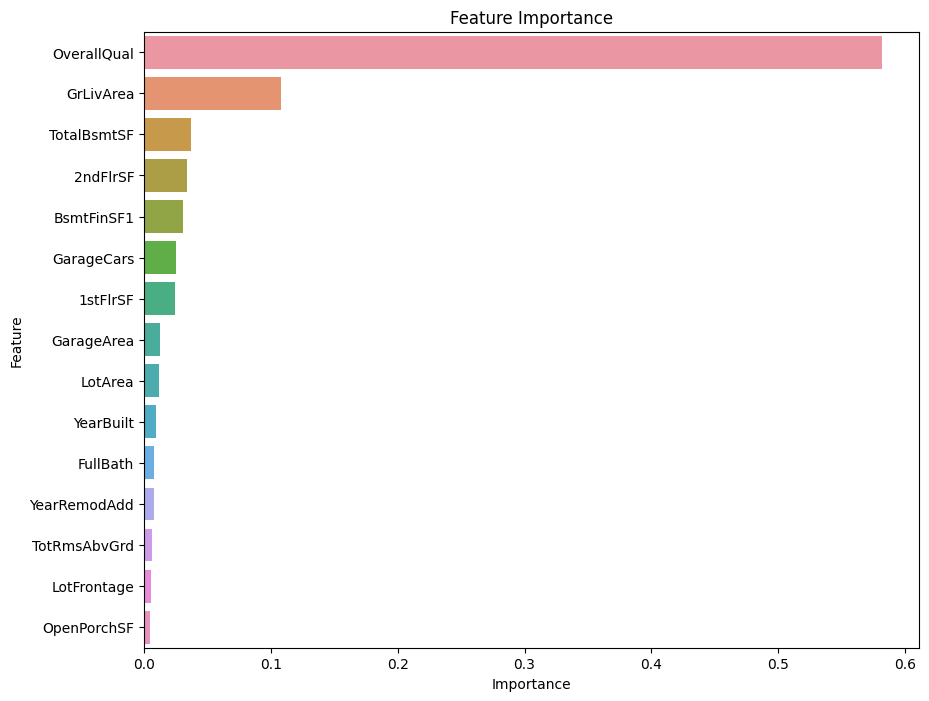

         Feature  Importance
4    OverallQual    0.581913
16     GrLivArea    0.108165
12   TotalBsmtSF    0.037201
14      2ndFlrSF    0.033606
9     BsmtFinSF1    0.030922
26    GarageCars    0.025592
13      1stFlrSF    0.024742
27    GarageArea    0.012862
3        LotArea    0.011794
6      YearBuilt    0.009232
19      FullBath    0.007941
7   YearRemodAdd    0.007842
23  TotRmsAbvGrd    0.006045
2    LotFrontage    0.005740
29   OpenPorchSF    0.004586
Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=262)


In [117]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances and their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Take the top 10 most important features
top_features = feature_importance_df.head(15)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=top_features)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

print(top_features)
print(X.columns)

**4. Correlation Analysis:** Calculate the correlation matrix of the features with the target variable and with each other. This will help you understand the strength and direction of the relationships between the features and the SalePrice.

In [118]:
# Calculate the correlation between each feature and the target variable (SalePrice)
correlation_with_saleprice = home_data[top_features.Feature].corrwith(home_data['SalePrice']).sort_values(ascending=False)

# Display the correlation values
print(correlation_with_saleprice)

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
BsmtFinSF1      0.386420
LotFrontage     0.329220
2ndFlrSF        0.319334
OpenPorchSF     0.315856
LotArea         0.263843
dtype: float64


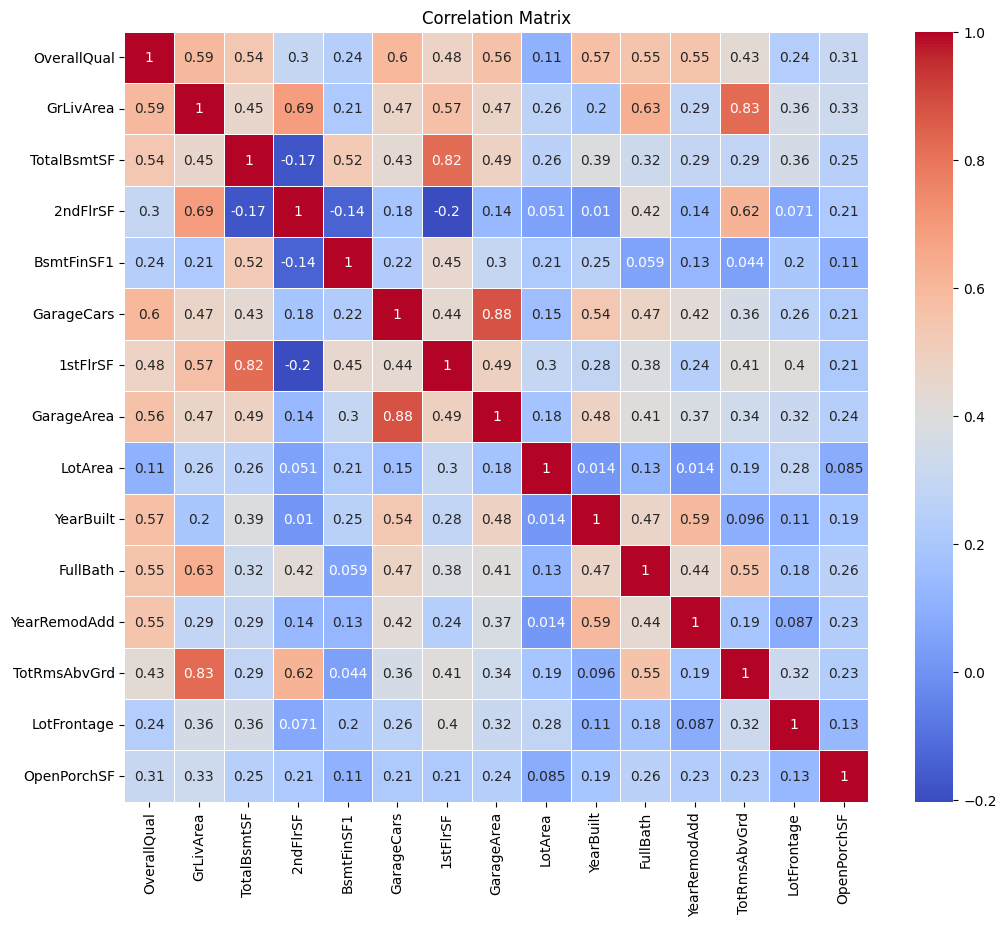

In [119]:
# Calculate the correlation matrix between all the features
correlation_matrix = home_data[top_features.Feature].corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

**5. Train-Test Split:** Split the data into training and testing sets to build and evaluate machine learning models effectively.

What is the best amount of features?

In [120]:
# Lists to store the number of features and corresponding errors
num_features_list = []
mae_train_list = []
mae_test_list = []

for n in range(15, 120):
    top_features = feature_importance_df.head(n)
    # Split the data into features (X) and target variable (y)
    X = home_data[top_features.Feature]
    y = home_data['SalePrice']

    # Split the data into training and testing sets (80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a RandomForestRegressor model
    rf_model = RandomForestRegressor(random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    ## Checking for overfitting ##
    # Make predictions on the training set
    y_train_pred = rf_model.predict(X_train)

    # Calculate the mean absolute error on the training set
    mae_train = mean_absolute_error(y_train, y_train_pred)
    #print(f"Number of Features: {n}, Mean Absolute Error on Training Set: {mae_train}")
    mae_train_list.append(mae_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate the mean absolute error on the test set
    mae_test = mean_absolute_error(y_test, y_pred)
    #print(f"Number of Features: {n}, Mean Absolute Error on Test Set: {mae_test}")
    mae_test_list.append(mae_test)

    num_features_list.append(n)

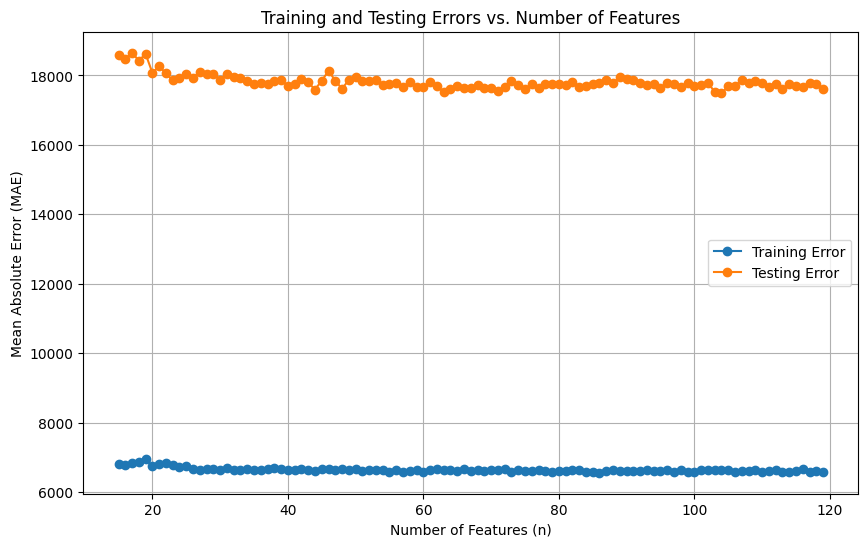

In [121]:
# Plot the training and testing errors against the number of features
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, mae_train_list, label='Training Error', marker='o')
plt.plot(num_features_list, mae_test_list, label='Testing Error', marker='o')
plt.xlabel('Number of Features (n)')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Testing Errors vs. Number of Features')
plt.legend()
plt.grid(True)
plt.show()

In [122]:
top_features = feature_importance_df.head(40)

In [123]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target variable (y)
X = home_data[top_features.Feature]
y = home_data['SalePrice']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**6. Model Building:** Utilize machine learning algorithms like RandomForestRegressor, GradientBoostingRegressor, or other regression algorithms to build predictive models for the SalePrice. Evaluate the model's performance using metrics like mean absolute error (MAE).


In [124]:
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Model Evaluation:
Evaluate the model's performance using metrics like mean absolute error (MAE) on the test data. The MAE measures the average absolute difference between the predicted SalePrice and the actual SalePrice.

In [125]:
from sklearn.metrics import mean_absolute_error

## Checking for overfitting ##
# Make predictions on the training set
y_train_pred = rf_model.predict(X_train)

# Calculate the mean absolute error on the training set
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error on Training Set:", mae_train)


# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error on Training Set: 6642.467311643836
Mean Absolute Error: 17693.173047945205



**7. Hyperparameter Tuning:** Optimize the hyperparameters of the models to improve their performance and avoid overfitting.


In [126]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 500, 800, 1000],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

best_mae = 10000000
best_n = 0
best_d = 0
best_s = 0
best_l = 0


for n in param_grid['n_estimators']:
    for d in param_grid['max_depth']:
        for s in param_grid['min_samples_split']:
            for l in param_grid['min_samples_leaf']: 
                # Create a RandomForestRegressor model
                rf_model = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l,random_state=42)

                # Fit the model on the training data
                rf_model.fit(X_train, y_train)

                # Make predictions on the test set
                y_pred = rf_model.predict(X_test)

                # Calculate the mean absolute error
                mae = mean_absolute_error(y_test, y_pred)

                if mae < best_mae:
                    print("Mean Absolute Error with ", n, "estimator ", d, " depth ", s, " min splits ", s, " and min leafs ", l, " : ",  mae)
                    best_n = n; best_d = d; best_s = s; best_l = l; best_mae = mae

Mean Absolute Error with  100 estimator  None  depth  2  min splits  2  and min leafs  1  :  17693.173047945205
Mean Absolute Error with  200 estimator  None  depth  2  min splits  2  and min leafs  1  :  17657.807328767125
Mean Absolute Error with  200 estimator  20  depth  2  min splits  2  and min leafs  1  :  17643.219975656295
Mean Absolute Error with  300 estimator  20  depth  2  min splits  2  and min leafs  1  :  17625.418872094222
Mean Absolute Error with  500 estimator  None  depth  2  min splits  2  and min leafs  1  :  17622.088883561642
Mean Absolute Error with  500 estimator  20  depth  2  min splits  2  and min leafs  1  :  17590.43576722952
Mean Absolute Error with  800 estimator  None  depth  2  min splits  2  and min leafs  1  :  17568.06412243151
Mean Absolute Error with  800 estimator  20  depth  2  min splits  2  and min leafs  1  :  17520.61516566573
Mean Absolute Error with  1000 estimator  20  depth  2  min splits  2  and min leafs  1  :  17517.690686239544



**8. Cross-Validation:** Implement cross-validation techniques (e.g., k-fold cross-validation) to validate the model's robustness and generalization ability.


In [127]:
from sklearn.model_selection import cross_val_score

# Create a new RandomForestRegressor model with the best hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_n, max_depth=best_d, min_samples_split=best_s, min_samples_leaf=best_l, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Calculate the mean of the cross-validation scores (negate the scores since they are negative MAE)
mean_cv_mae = -cv_scores.mean()
print("Mean Cross-Validation MAE:", mean_cv_mae)

Mean Cross-Validation MAE: 18115.589854321694



**9. Model Evaluation:** Compare the performance of different models and select the one that performs best on the test data.



**10. Feature Engineering:** Try creating new features or transformations of existing features that may improve the model's performance.


In [128]:
# Fit the best model on the entire training data
best_rf_model.fit(X_train, y_train)

# Make predictions on new data (e.g., X_new)
y_new_pred = best_rf_model.predict(X_new)

# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances and their corresponding feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


NameError: name 'X_new' is not defined


**11. Prediction and Interpretation:** Use the best model to make predictions on new data and interpret the results. Examine the feature importances and their impact on SalePrice predictions.



**12. Residual Analysis:** Analyze the model's residuals to check for patterns or biases in the predictions. Residual plots can provide insights into areas where the model might be improved.



**13. Limitations and Insights:** Discuss the limitations of the model and insights gained from the analysis. Identify areas where further data collection or model improvement may be beneficial.

**Visualization of the model**

In [138]:
best_rf_model = RandomForestRegressor(n_estimators=best_n, max_depth=best_d, min_samples_split=best_s, min_samples_leaf=best_l, random_state=42)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l,random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 17555.10562671233


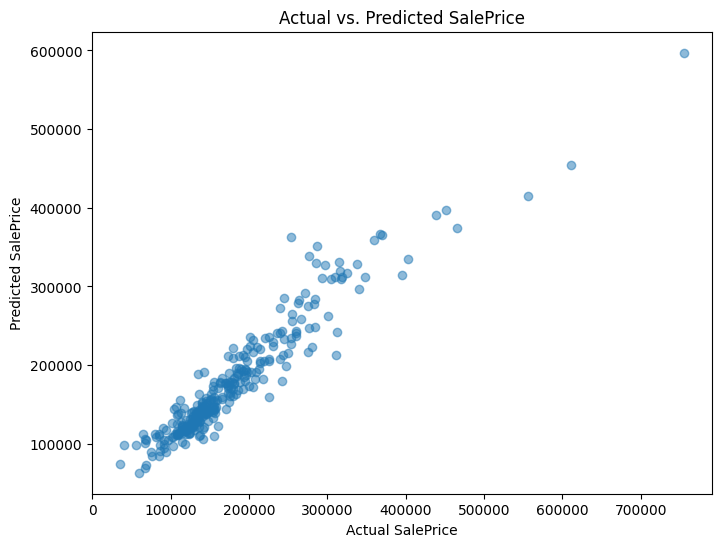

In [140]:
# Visualize the actual vs. predicted SalePrice using a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs. Predicted SalePrice")
plt.show()

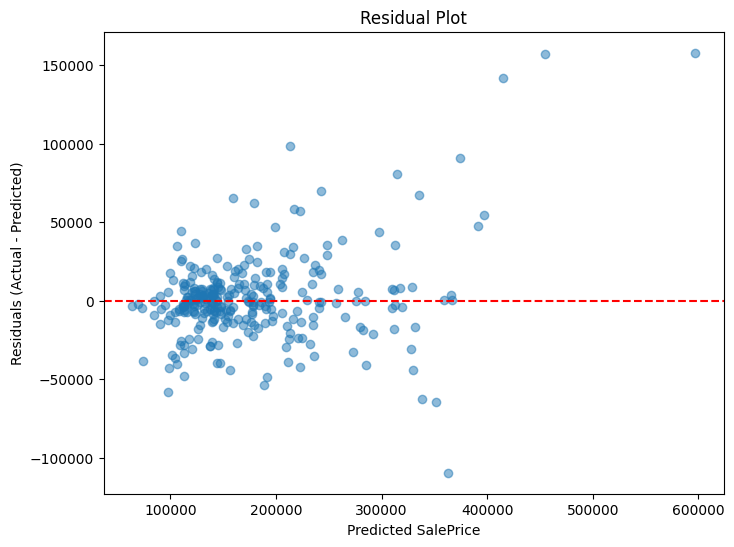

In [141]:
# Calculate the residuals (difference between actual and predicted SalePrice)
residuals = y_test - y_pred

# Visualize the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()

**Analyzing the biggest outliers**

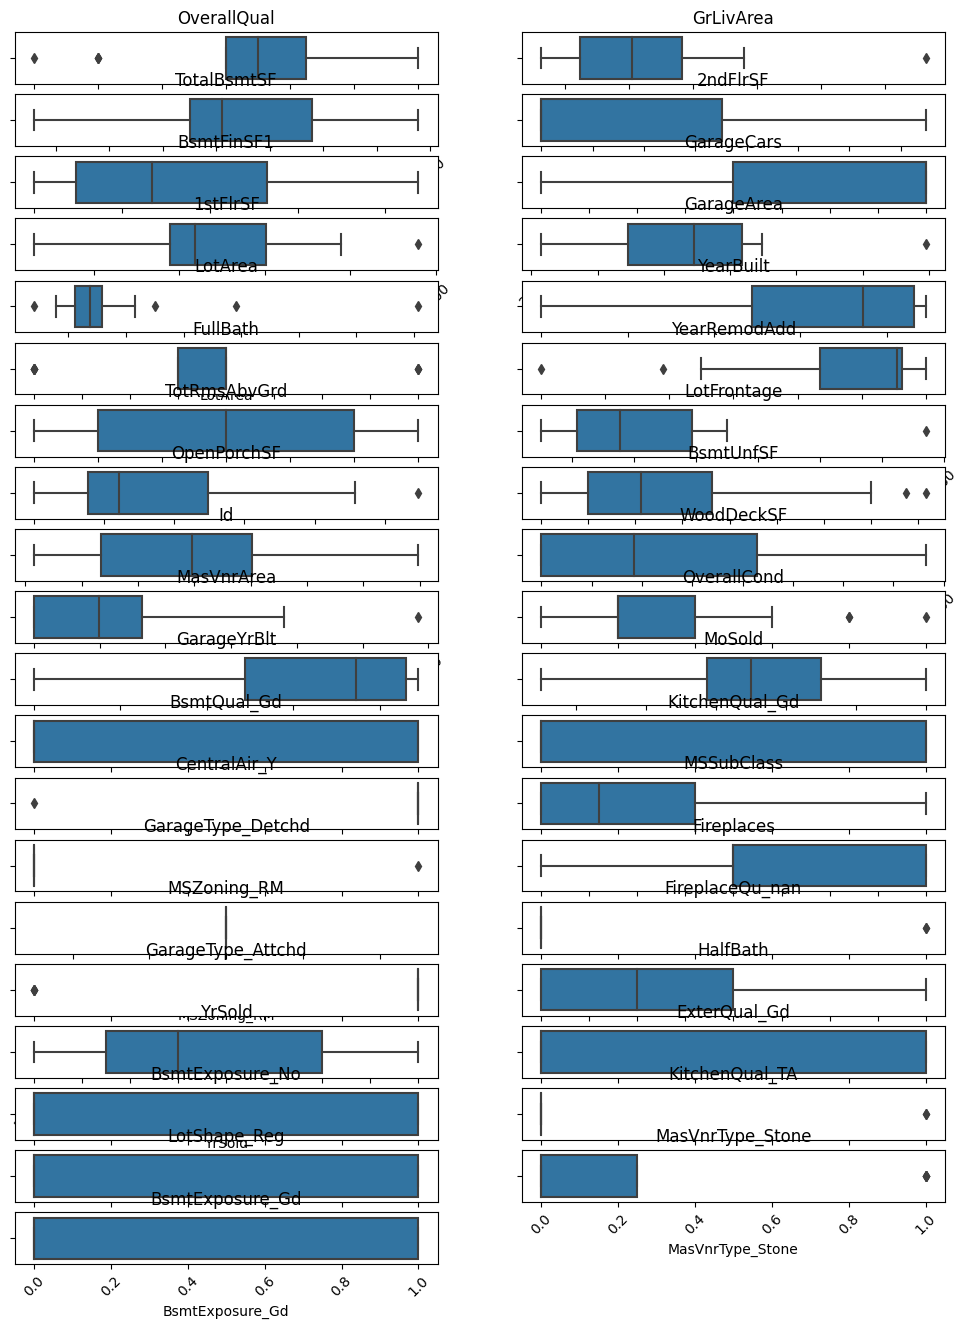

In [202]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the absolute residuals
residuals = abs(y_test - y_pred)

# Find the instances with the largest absolute residuals
largest_residuals_idx = residuals.nlargest(20).index

# Get the corresponding feature values for these instances
instances_with_largest_residuals = X_test.loc[largest_residuals_idx]

# Get the number of features
num_features = len(instances_with_largest_residuals.columns)

# Create subplots with two columns for each feature
plt.figure(figsize=(12, 16))
for i, col in enumerate(instances_with_largest_residuals.columns):
    plt.subplot(num_features // 2 + num_features % 2, 2, i+1)
    sns.boxplot(x=instances_with_largest_residuals[col])
    plt.title(col)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

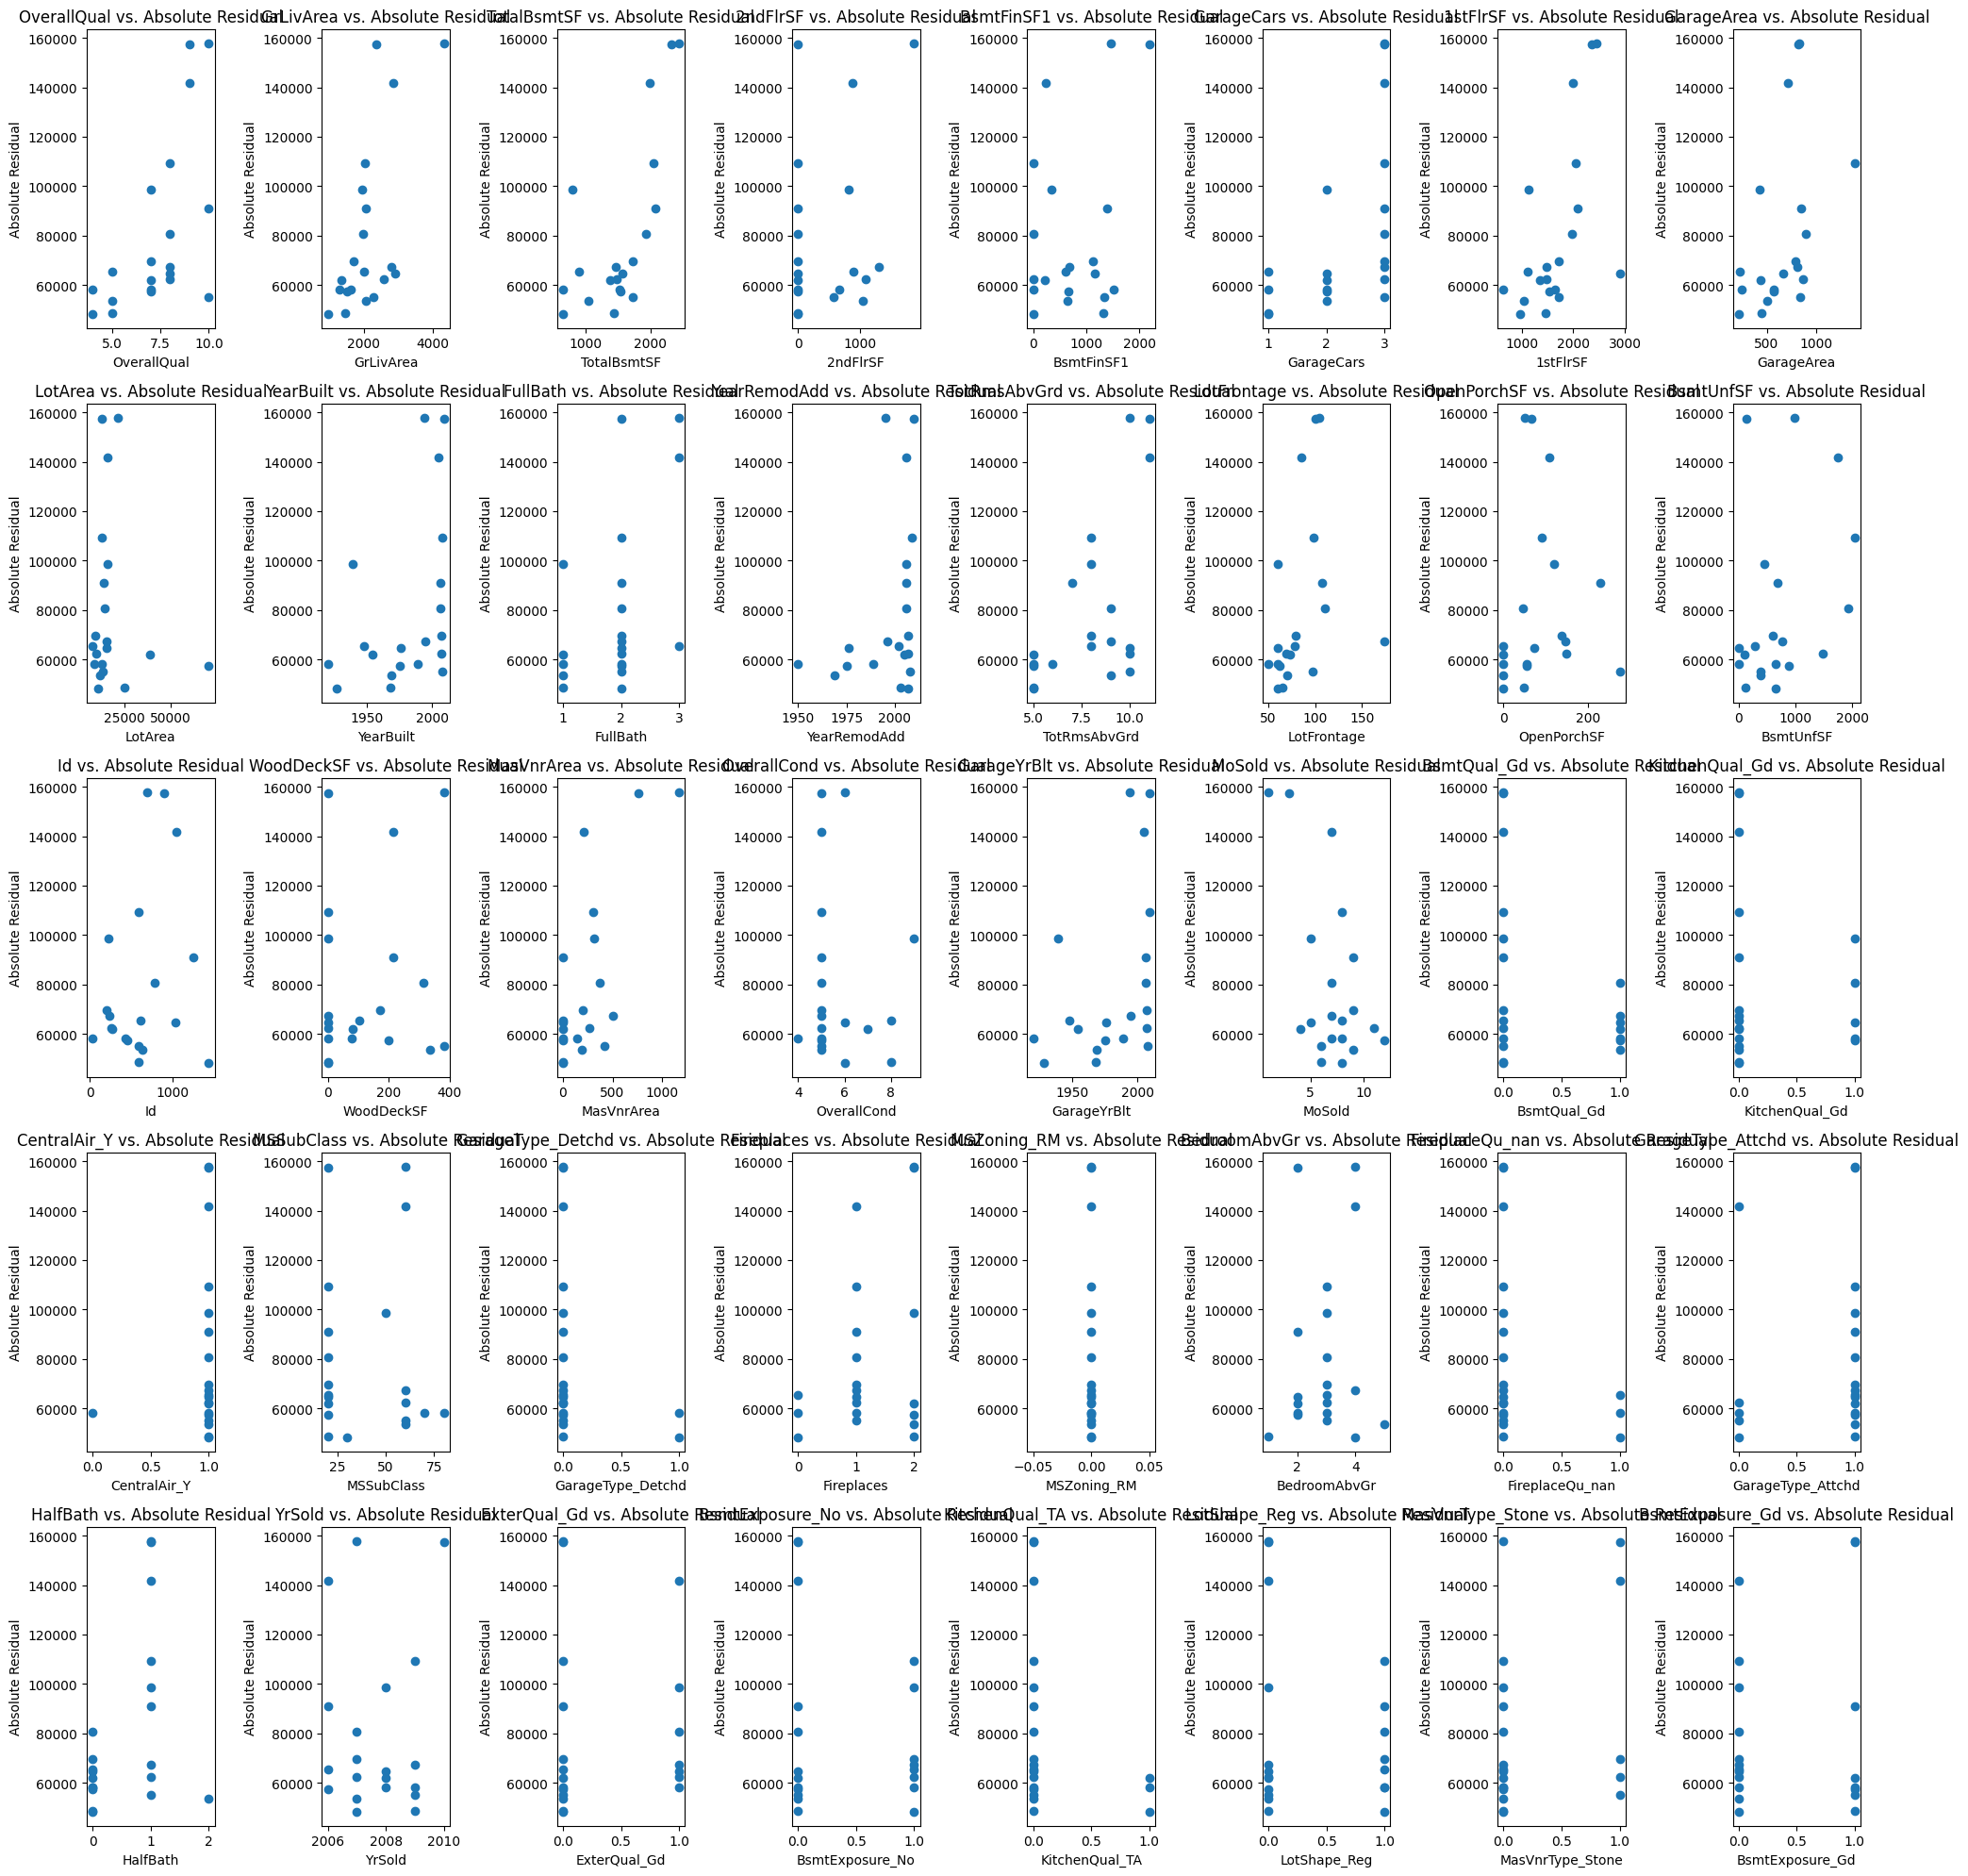

In [185]:
# Visualize scatter plots between features and absolute residuals
num_features = len(instances_with_largest_residuals.columns)
num_rows = (num_features - 1) // 8 + 1

plt.figure(figsize=(20, 4*num_rows))
for i, col in enumerate(instances_with_largest_residuals.columns):
    plt.subplot(num_rows, 8, i+1)
    plt.scatter(instances_with_largest_residuals[col], residuals[largest_residuals_idx])
    plt.xlabel(col)
    plt.ylabel('Absolute Residual')
    plt.title(f'{col} vs. Absolute Residual')
plt.tight_layout()
plt.show()



Correlation analysis

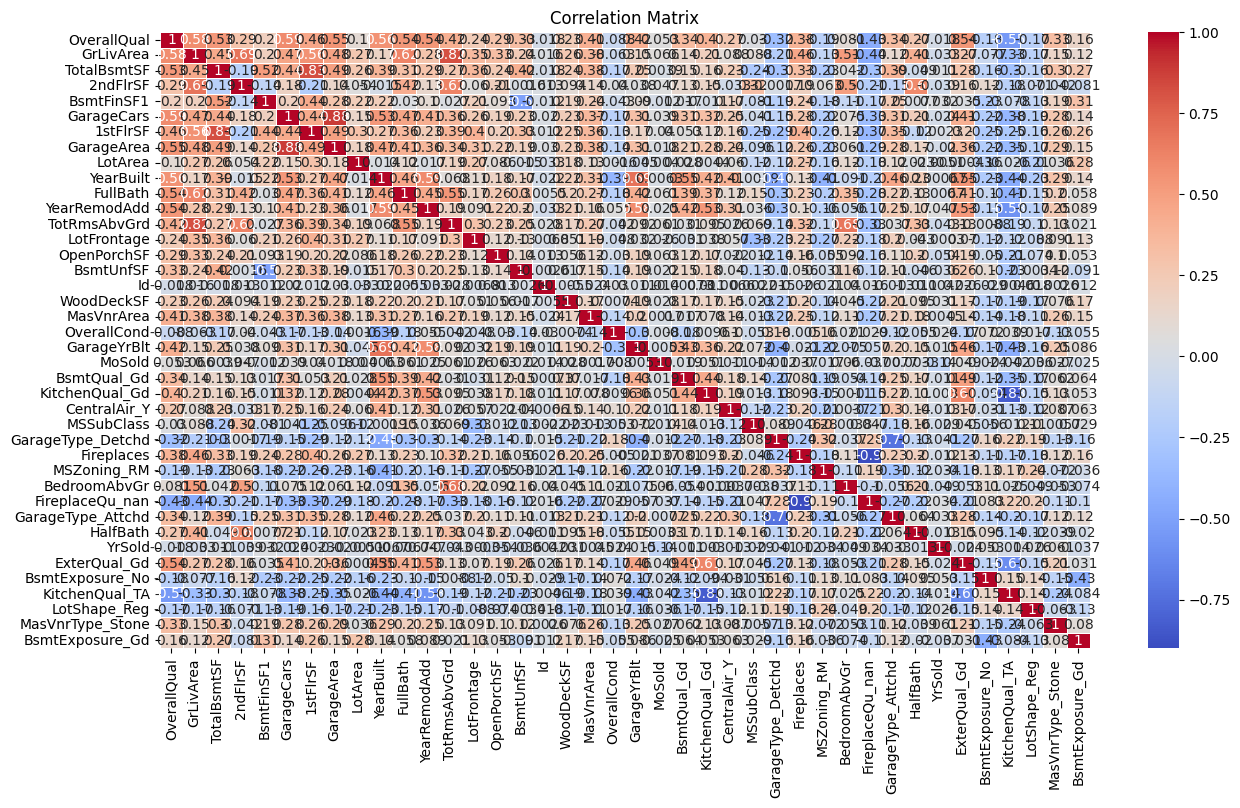

In [183]:
# Calculate the correlation matrix between all the features
correlation_matrix = X_train.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


# Fixing the outliers

In [187]:
print("Actual Mean Absolute Error:", mae)

Actual Mean Absolute Error: 17555.10562671233


Removing the features that are the most sparse: WoodDeckSF = 17526, Id = 17439 (both 17418), LotShape_Reg = 17521, FireplaceQu_nan = 17541, KitchenQual_TA=17533.697852739722, GarageType_Detchd = 17443, MoSold = 17514

'FireplaceQu_nan','WoodDeckSF', 'Id', 'LotShape_Reg', 'GarageType_Detchd', 'KitchenQual_TA'

In [238]:
# Split the data into features (X) and target variable (y)
X = home_data[top_features.Feature].drop(columns=['FireplaceQu_nan','WoodDeckSF', 'Id', 'LotShape_Reg', 'GarageType_Detchd', 'KitchenQual_TA'])
y = home_data['SalePrice']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
best_rf_model = RandomForestRegressor(n_estimators=best_n, max_depth=best_d, min_samples_split=best_s, min_samples_leaf=best_l, random_state=42)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l,random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 17308.641558219177


Search **automatically** the worst features

In [241]:
for feature in top_features.Feature:
    # Split the data into features (X) and target variable (y)
    X = home_data[top_features.Feature].drop(columns=[feature])
    y = home_data['SalePrice']

    # Split the data into training and testing sets (80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_rf_model = RandomForestRegressor(n_estimators=best_n, max_depth=best_d, min_samples_split=best_s, min_samples_leaf=best_l, random_state=42)

    # Create a RandomForestRegressor model
    rf_model = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l,random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    if mae < 17555.10562671233:
        print("For feature ", feature, " Mean Absolute Error:", mae)

For feature  BsmtFinSF1  Mean Absolute Error: 17543.504578767122
For feature  FullBath  Mean Absolute Error: 17517.6033869863
For feature  TotRmsAbvGrd  Mean Absolute Error: 17503.249551369863
For feature  LotFrontage  Mean Absolute Error: 17541.72572260274
For feature  OpenPorchSF  Mean Absolute Error: 17383.988030821918
For feature  BsmtUnfSF  Mean Absolute Error: 17525.61760958904
For feature  Id  Mean Absolute Error: 17439.758219178082
For feature  WoodDeckSF  Mean Absolute Error: 17526.757791095893
For feature  GarageYrBlt  Mean Absolute Error: 17522.219349315066
For feature  MoSold  Mean Absolute Error: 17514.359089041096
For feature  CentralAir_Y  Mean Absolute Error: 17474.975325342464
For feature  GarageType_Detchd  Mean Absolute Error: 17443.89662328767
For feature  FireplaceQu_nan  Mean Absolute Error: 17541.408414383564
For feature  GarageType_Attchd  Mean Absolute Error: 17531.07314726027
For feature  KitchenQual_TA  Mean Absolute Error: 17533.697852739722
For feature  Lot

In [261]:
feature_mae_dict = {
    'BsmtFinSF1': 17543.504578767122,
    'FullBath': 17517.6033869863,
    'TotRmsAbvGrd': 17503.249551369863,
    'LotFrontage': 17541.72572260274,
    'OpenPorchSF': 17383.988030821918,
    'BsmtUnfSF': 17525.61760958904,
    'Id': 17439.758219178082,
    'WoodDeckSF': 17526.757791095893,
    'GarageYrBlt': 17522.219349315066,
    'MoSold': 17514.359089041096,
    'CentralAir_Y': 17474.975325342464,
    'GarageType_Detchd': 17443.89662328767,
    'FireplaceQu_nan': 17541.408414383564,
    'GarageType_Attchd': 17531.07314726027,
    'KitchenQual_TA': 17533.697852739722,
    'LotShape_Reg': 17521.325297945205
}

# Sort the feature_mae_dict by the values in ascending order
sorted_feature_mae = sorted(feature_mae_dict.items(), key=lambda x: x[1])

# Create an ordered dictionary from the sorted list of tuples
ordered_feature_mae_dict = dict(sorted_feature_mae)

In [266]:
features_removed = []
prev_mae = 17555

for feature in ordered_feature_mae_dict.keys():
    features_removed.append(feature)

    # Split the data into features (X) and target variable (y)
    X = home_data[top_features.Feature].drop(columns=features_removed)
    y = home_data['SalePrice']

    # Split the data into training and testing sets (80% for training, 20% for testing)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    best_rf_model = RandomForestRegressor(n_estimators=best_n, max_depth=best_d, min_samples_split=best_s, min_samples_leaf=best_l, random_state=42)

    # Create a RandomForestRegressor model
    rf_model = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l,random_state=42)

    # Fit the model on the training data
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    print("Mean Absolute Error:", mae, " with features removed: ", features_removed)

    if mae > prev_mae: 
        features_removed.pop()
    else: 
        prev_mae = mae

Mean Absolute Error: 17383.988030821918  with features removed:  ['OpenPorchSF']
Mean Absolute Error: 17292.067421232878  with features removed:  ['OpenPorchSF', 'Id']
Mean Absolute Error: 17223.53905479452  with features removed:  ['OpenPorchSF', 'Id', 'GarageType_Detchd']
Mean Absolute Error: 17163.802157534246  with features removed:  ['OpenPorchSF', 'Id', 'GarageType_Detchd', 'CentralAir_Y']
Mean Absolute Error: 17143.183328767125  with features removed:  ['OpenPorchSF', 'Id', 'GarageType_Detchd', 'CentralAir_Y', 'TotRmsAbvGrd']
Mean Absolute Error: 17093.310280821916  with features removed:  ['OpenPorchSF', 'Id', 'GarageType_Detchd', 'CentralAir_Y', 'TotRmsAbvGrd', 'MoSold']
Mean Absolute Error: 17139.06229452055  with features removed:  ['OpenPorchSF', 'Id', 'GarageType_Detchd', 'CentralAir_Y', 'TotRmsAbvGrd', 'MoSold', 'FullBath']
Mean Absolute Error: 17095.389633561645  with features removed:  ['OpenPorchSF', 'Id', 'GarageType_Detchd', 'CentralAir_Y', 'TotRmsAbvGrd', 'MoSold', 

Taking out the worst features:

In [267]:
# Split the data into features (X) and target variable (y)
X = home_data[top_features.Feature].drop(columns=features_removed)
y = home_data['SalePrice']

# Split the data into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

best_rf_model = RandomForestRegressor(n_estimators=best_n, max_depth=best_d, min_samples_split=best_s, min_samples_leaf=best_l, random_state=42)

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(n_estimators=n, max_depth=d, min_samples_split=s, min_samples_leaf=l,random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 16808.359369863017


# Train a model for the competition

The code cell above trains a Random Forest model on **`train_X`** and **`train_y`**.  

Use the code cell below to build a Random Forest model and train it on all of **`X`** and **`y`**.

In [268]:
# To improve accuracy, create a new Random Forest model which you will train on all training data
rf_model_on_full_data = RandomForestRegressor(n_estimators=best_n, max_depth=best_d, min_samples_split=best_s, min_samples_leaf=best_l, random_state=42)

# fit rf_model_on_full_data on all data from the training data
rf_model_on_full_data.fit(X,y)

RandomForestRegressor(max_depth=20, n_estimators=1000, random_state=42)

Now, read the file of "test" data, and apply your model to make predictions.

In [269]:
# path to file you will use for predictions
test_data_path = 'test.csv'

# read test data file using pandas
test_data = pd.read_csv(test_data_path)

In [270]:
from sklearn.preprocessing import OneHotEncoder

# Select columns with categorical values
categorical_columns = test_data.select_dtypes(include='object').columns

# Step 1: Encoding Categorical Variables

# Use one-hot encoding to convert categorical variables into numerical format
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = pd.DataFrame(encoder.fit_transform(test_data[categorical_columns]))
encoded_data.columns = encoder.get_feature_names_out(categorical_columns)

# Replace the original categorical columns with the encoded data
test_data.drop(columns=categorical_columns, inplace=True)
test_data = pd.concat([test_data, encoded_data], axis=1)

# Step 2: Handling Missing Values

# Check for missing values in the preprocessed data
missing_values_count = test_data.isnull().sum()
print("Missing Values Count:\n", missing_values_count)

# If there are missing values, decide on the best approach to handle them.
# For example, you can impute missing values with the most frequent value or remove rows with missing values.

# For illustration, let's impute missing values with the most frequent value.
test_data.fillna(test_data.mode().iloc[0], inplace=True)

# Check again for missing values after imputation
missing_values_count_after_imputation = test_data.isnull().sum()
print("Missing Values Count after Imputation:\n", missing_values_count_after_imputation)

Missing Values Count:
 Id                         0
MSSubClass                 0
LotFrontage              227
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 250, dtype: int64
Missing Values Count after Imputation:
 Id                       0
MSSubClass               0
LotFrontage              0
LotArea                  0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 250, dtype: int64


c:\Users\Dani\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [272]:
# create test_X which comes from test_data but includes only the columns you used for prediction.
# The list of columns is stored in a variable called features
test_X = test_data[top_features.Feature].drop(columns=features_removed)

# make predictions which we will submit. 
test_preds = rf_model_on_full_data.predict(test_X)

# Comprobar el error
#print(test_data.columns)
# rf_val_mae = mean_absolute_error(test_preds, test_Y)

# Generate a submission

Run the code cell below to generate a CSV file with your predictions that you can use to submit to the competition.

In [273]:
# Run the code to save predictions in the format used for competition scoring

output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': test_preds})
output.to_csv('1.submission.csv', index=False)